# Import Libraries

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [4]:
df = pd.read_csv('netflix.csv')

In [5]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
1,2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2,2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
3,2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
4,2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


In [7]:
df.shape

(4881, 7)

In [8]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4881.000000,4881.000000,4881.000000,4881.000000,4.881000e+03,4881.000000
mean,107.003361,103.742674,105.388477,105.434149,1.679949e+07,105.434149
std,159.326383,154.662309,157.007060,157.073188,1.936794e+07,157.073188
min,0.410714,0.346429,0.377857,0.372857,2.856000e+05,0.372857
25%,3.977143,3.838571,3.901429,3.906429,6.286300e+06,3.906429
50%,22.261429,21.150000,21.524286,21.632856,1.082310e+07,21.632856
75%,127.430000,123.589996,125.949997,125.389999,2.015640e+07,125.389999
max,646.840027,630.859985,642.229980,639.099976,3.234140e+08,639.099976


In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4881 non-null   datetime64[ns]
 1   High       4881 non-null   float64       
 2   Low        4881 non-null   float64       
 3   Open       4881 non-null   float64       
 4   Close      4881 non-null   float64       
 5   Volume     4881 non-null   float64       
 6   Adj Close  4881 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 267.1 KB


In [21]:
df = df.iloc[4000:, :]

In [22]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
4000,2018-04-13,317.489990,308.230011,317.290009,311.649994,12046600.0,311.649994
4001,2018-04-16,316.100006,304.000000,315.989990,307.779999,20307900.0,307.779999
4002,2018-04-17,338.619995,323.769989,329.660004,336.059998,33866500.0,336.059998
4003,2018-04-18,338.820007,331.100006,336.299988,334.519989,11221100.0,334.519989
4004,2018-04-19,335.309998,326.769989,332.880005,332.700012,8438800.0,332.700012
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


In [23]:
len(df)

881

# Visualization

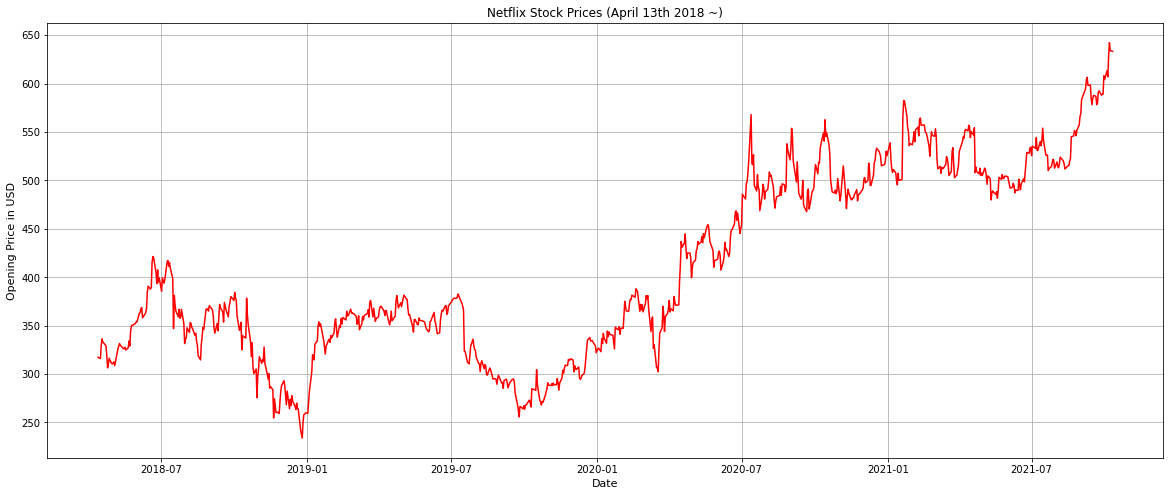

In [27]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(df['Date'], df['Open'], color='r')

ax.set_xlabel('Date', fontsize=11)
ax.set_ylabel('Opening Price in USD', fontsize=11)
plt.title('Netflix Stock Prices (April 13th 2018 ~)')
plt.grid()
plt.show()

# Data Pre-processing

In [28]:
df = df.drop(columns=['High', 'Low', 'Close','Volume','Adj Close'])

In [29]:
df

,Date,Open
4000,2018-04-13,317.290009
4001,2018-04-16,315.989990
4002,2018-04-17,329.660004
4003,2018-04-18,336.299988
4004,2018-04-19,332.880005
...,...,...
4876,2021-10-05,606.940002
4877,2021-10-06,628.179993
4878,2021-10-07,642.229980
4879,2021-10-08,634.169983


In [32]:
for i in range(len(df)):
    
    df['Date'][4000+i] = i
    
df

,Date,Open
4000,0,317.290009
4001,1,315.989990
4002,2,329.660004
4003,3,336.299988
4004,4,332.880005
...,...,...
4876,876,606.940002
4877,877,628.179993
4878,878,642.229980
4879,879,634.169983


# Unsupervised Learning : KNN

In [34]:
# Create Model
nbrs = NearestNeighbors(n_neighbors=10)

# Fit Model
nbrs.fit(df)

NearestNeighbors(n_neighbors=10)

In [36]:
# dir(nbrs)

In [37]:
# distances and indexes of k-neaighbors from model outputs
distance, index = nbrs.kneighbors(df)


In [56]:
distance[0]

array([ 0.        ,  1.64013646,  7.26118942, 10.05393544, 11.58206478,
       12.53063363, 12.63678817, 13.29132245, 13.53686423, 13.85731653])

In [57]:
distance[1]

array([ 0.        ,  1.64013646,  6.81417427,  9.00375505,  9.99399735,
       11.14478496, 11.89723943, 12.35706094, 12.76070406, 13.43726008])

In [55]:
# mean for 10 nearest neighbors
distance[0].mean()

9.639025110931318

In [58]:
distance[1].mean()

8.904911260567037

# Visualize KNN

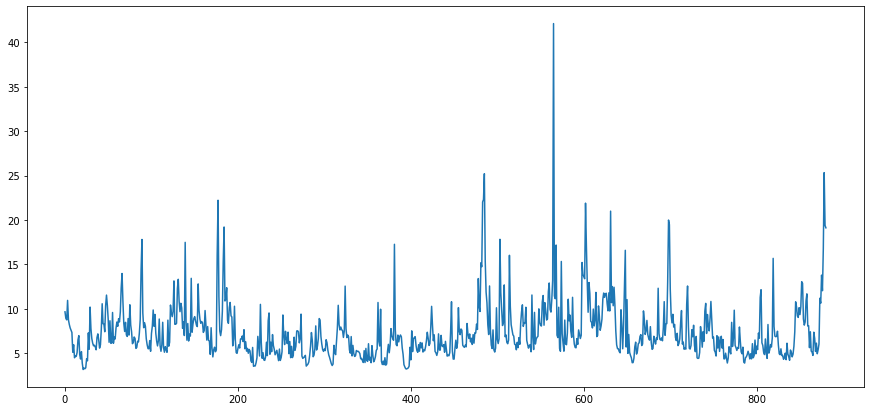

In [43]:
plt.figure(figsize=(15, 7))
plt.plot(distance.mean(axis=1))

In [60]:
distanse_df = pd.DataFrame(distance)

In [61]:
distanse_df

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.640136,7.261189,10.053935,11.582065,12.530634,12.636788,13.291322,13.536864,13.857317
1,0.0,1.640136,6.814174,9.003755,9.993997,11.144785,11.897239,12.357061,12.760704,13.437260
2,0.0,3.790568,3.943804,4.032383,6.714863,11.575563,12.530634,13.706541,15.464077,15.614999
3,0.0,3.563184,4.543819,6.714863,7.753864,16.704487,16.774975,17.440180,17.542119,18.254381
4,0.0,1.198167,3.563184,3.790568,4.232373,13.985553,14.585200,14.755357,15.063347,16.094968
...,...,...,...,...,...,...,...,...,...,...
876,0.0,3.198760,3.360069,6.527071,16.047232,18.006136,18.022855,18.057043,18.370755,18.623740
877,0.0,5.848128,6.315060,14.085530,14.924592,20.523574,21.263518,24.127240,28.850044,31.502919
878,0.0,8.121795,9.248801,14.085530,28.995579,34.543768,35.346606,38.199992,40.972897,43.758297
879,0.0,1.393141,6.315060,8.121795,21.161453,26.800264,27.394741,30.344760,34.760476,37.468737


In [76]:
distance_mean = distanse_df.mean(axis=1)

In [84]:
distance_mean

0       9.639025
1       8.904911
2       8.737343
3      10.929187
4       8.726872
         ...    
876    12.021366
877    16.744061
878    25.327327
879    19.376043
880    19.108079
Length: 881, dtype: float64

In [77]:
type(distance_mean)

pandas.core.series.Series

In [63]:
distanse_df.loc[0,].mean()

9.639025110931314

# Get Anomaly Points
### Set thresholds with reference to statistics.

In [78]:
distance_mean.describe()

count    881.000000
mean       7.380966
std        3.273057
min        3.141603
25%        5.352988
50%        6.589125
75%        8.408707
max       42.124777
dtype: float64

### Since 75th percentile is 8.35, we will set threshold into 9.0

In [79]:
th = 9
outlier_index = np.where(distance_mean > th)

In [81]:
type(outlier_index)

tuple

In [82]:
outlier_index

(array([  0,   3,  29,  43,  47,  48,  49,  55,  64,  65,  66,  67,  75,
         88,  89,  90, 102, 104, 122, 123, 124, 125, 126, 130, 131, 132,
        133, 134, 135, 139, 146, 150, 154, 155, 162, 176, 177, 178, 182,
        183, 184, 185, 186, 187, 190, 191, 192, 193, 196, 226, 236, 252,
        273, 316, 324, 362, 365, 381, 424, 447, 455, 478, 479, 480, 481,
        482, 483, 484, 485, 486, 487, 488, 491, 499, 503, 504, 505, 508,
        514, 515, 528, 529, 533, 540, 543, 548, 552, 553, 555, 556, 559,
        560, 561, 562, 563, 564, 565, 566, 567, 568, 571, 574, 582, 584,
        587, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 611, 614,
        617, 618, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632,
        633, 634, 635, 636, 643, 647, 648, 650, 669, 686, 693, 697, 698,
        699, 700, 701, 703, 713, 719, 720, 740, 741, 743, 747, 774, 804,
        805, 819, 845, 846, 847, 848, 849, 850, 851, 852, 853, 857, 858,
        873, 874, 875, 876, 877, 878, 879, 880]),)

In [83]:
len(outlier_index)

1

In [85]:
outlier_value = df.iloc[outlier_index]

In [86]:
outlier_value

,Date,Open
4000,0,317.290009
4003,3,336.299988
4029,29,344.339996
4043,43,384.269989
4047,47,415.149994
...,...,...
4876,876,606.940002
4877,877,628.179993
4878,878,642.229980
4879,879,634.169983


# Visualize Abnormal Points

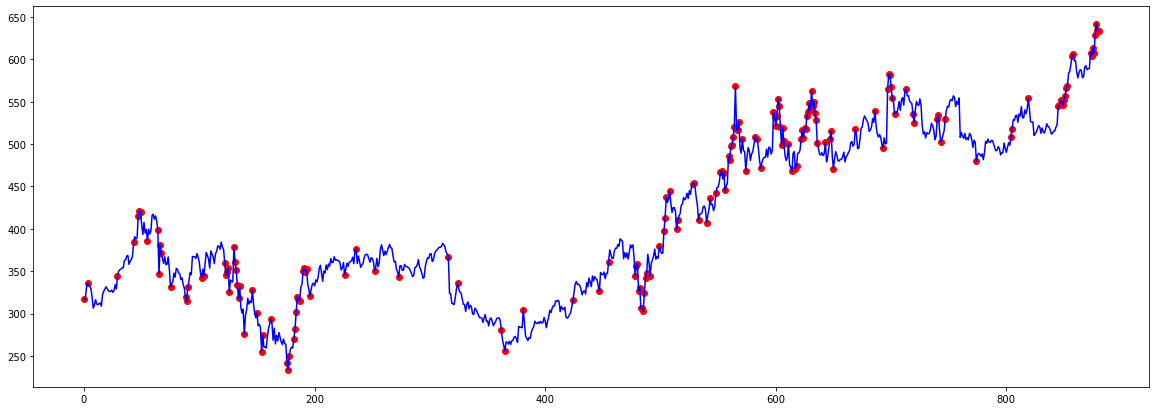

In [87]:
plt.figure(figsize=(20, 7))
plt.plot(df['Date'], df['Open'], color='b')
plt.scatter(outlier_value['Date'], outlier_value['Open'], color='r')